# Excercise 2


Đinh Vũ Gia Hân - 22127098

---

# Hoeffding Inequality

Experiment:
- Flip 1,000 coins and flip each coin independently.
- Focus on 3 coin:
    - $c_1$ is the first coin flipped.
    - $c_{rand}$ is a random coin chosen from the 1,000.
    - $c_{min}$ is the which had the minimum frequency of heads (the earlier one).
- $v_1$, $v_{rand}$, $v_{min}$ are the fraction of heads obtained for the 3 respective coins out of the 10 tosses.

We will run this experiment 100,000 times to get a full distributiom of $v_1$, $v_{rand}$, $v_{min}$

## 1.
This exercise is referenced from the source [1]. 

We will apply Hoeffding's Law to solve this problem:
$$P(|E_{in} - E_{out}| > \epsilon) \leq 2 \epsilon^{-2 \epsilon^2 N}$$

Because of a small number of samples, random variations can have a large impact, so we will choose a large tolerance ($\epsilon = 0.3$) to get the meaningful bounds.

Each coin flip is an independent trial with probability 0.5. As we have a large number of coins, the error of out of sample will converge to 0.5.

In [1]:
# import necessary libraries
import numpy as np

In [2]:
N_COINS = 1000          # number of coins
N_FLIPS = 10            # number of flips per coin
N_EXPERIMENTS = 100000  # number of experiments to run

EPSILON = 0.3           # error tolerance    
E_OUT = 0.5             # out-of-sample error
hoeffding_bound = 2 * np.exp(-2 * N_FLIPS * EPSILON**2) # Hoeffding bound

In [3]:
def run_the_experiment():
    """
    Run the experiment to flip 1000 coins, each coin is flipped 10 times.
    Compute the fraction of heads obtained for each coin.

    Returns:
    --------
    np.array: the fraction of heads obtained for each coin
    """
    # flip 1000 coins, each coin is flipped 10 times
    flips = np.random.randint(2, size = (N_COINS, N_FLIPS))
    
    # the first coin flipped
    c1 = flips[0]

    # a random coin flipped
    c_rand = flips[np.random.randint(N_COINS)]

    # the coin with the minimum number of heads
    heads_count = np.count_nonzero(flips, axis = 1)
    c_min = flips[np.argmin(heads_count)]

    # compute the fraction of heads obtained for each coin
    v1 = np.mean(c1)
    v_rand = np.mean(c_rand)
    v_min = np.mean(c_min)

    return np.array([v1, v_rand, v_min])

In [4]:
# question 1
# run the experiment 100000 times
v = np.array([run_the_experiment() for _ in range(N_EXPERIMENTS)])

# compute the average value of v
E_IN = np.mean(v, axis = 0)

# print result
print('The average value of v_min is:', E_IN[2])

The average value of v_min is: 0.03763599999997672


In [5]:
# question 2
p = np.abs(E_IN - E_OUT) > EPSILON

print('Is c1 sastisfying the Hoeffding Inequality:', np.mean(p[0]) < hoeffding_bound)
print('Is c_rand sastisfying the Hoeffding Inequality:', np.mean(p[1]) < hoeffding_bound)
print('Is c_min sastisfying the Hoeffding Inequality:', np.mean(p[2]) < hoeffding_bound)

Is c1 sastisfying the Hoeffding Inequality: True
Is c_rand sastisfying the Hoeffding Inequality: True
Is c_min sastisfying the Hoeffding Inequality: False


**Question 1**: the result closes to the answer: [b] 0.01

**Question 2**: the correct answer is: [d] $c_1 \text{ and } c_{rand}$

# Error and Noise

In this part, we have two binary function:
- $h$: hypothesis that approximates f
- $f$: target function

Hypothesis $h$ makes an error with probability $\mu$ when approximating $f$, so we can infer that:
- $h(x) = f(x)$ with probability $1 - \mu$
- $h(x) \neq f(x)$ with probability $\mu$


A noisy version of f is defined as:

$P(y \mid \mathbf{x}) = 
\begin{cases} 
      \lambda & y = f(x) \\
      1 - \lambda & y \neq f(x) 
\end{cases}$

## 3.

The probability of error that h makes in approximating y is depends on two cases:
- $h(x) = f(x)$ and $y \neq f(x)$
- $h(x) \neq f(x)$ and $y = f(x)$

Combining both cases, we get the total probability of error as:

$$P(error) = (1 - \mu) (1 - \lambda) + \mu \lambda$$

**Question 3**: the correct answer is: [e] $P(error) = (1 - \mu) * (1 - \lambda) + \mu * \lambda$

## 4.
From question 4, we have:

$\begin{align}
P(\text{error}) &= (1 - \mu) (1 - \lambda) + \mu \lambda \\
&= 1 - \mu - \lambda + 2 \mu \lambda
\end{align}$

Substitute $\lambda = \frac{1}{2}$ into (1), we have:

$\begin{align}
P(error) &= 1 - \mu - \frac{1}{2} + 2 \mu . \frac{1}{2} \\
&= 1 - \mu - \frac{1}{2} + \mu \\
&= \frac{1}{2}
\end{align}$

We can see that the performance of $h$ is independent of $\mu$ at $\lambda = \frac{1}{2}$.

**Question 4**: the correct answer is: [b] 0.5

# Linear Regression

Experiment:
- The input space $X = [-1, 1] \times [-1, 1]$.
- For each experiment, a random line is chosen as the target function $f$. This line is created by picking two random points within $[-1, 1] \times [-1, 1]$ and using a line passes through them. The line divides the plane into two regoins: point on one side are labeled +1, and those on the other side are labeled -1.
- Generate a 2-dimensional data set $D$. Each input $x_n$ is a randomly chosen point in X, and the target function f is evaluated on each $x_n$ to assign an output label $y_n$ based on which side of the line $x_n$ falls.

In [6]:
# import necessary libraries
import matplotlib.pyplot as plt

In [7]:
def generate_target_w():
    """
    Generates target_w from two random, uniformly distributed points in [-1, 1] x [-1, 1].
    
    Returns
    -------
    target_w : numpy array, shape (3, 1) 
        The vector of parameters of f.
    p1 : numpy array, shape (2, 1)
        The first point.
    p2 : numpy array, shape (2, 1)
        The second point.
    """
    # Generate two points from a uniform distribution over [-1, 1]x[-1, 1]
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)

    # Compute the target W from these two points
    target_w = np.array([p1[1] * p2[0] - p1[0] * p2[1], p2[1] - p1[1], p1[0] - p2[0]]).reshape((-1, 1))
    
    return target_w, p1, p2

def generate_data_1(N, target_w):
    """
    Generates a data set by generating random inputs and then using target_w to generate the 
    corresponding outputs.
    
    Parameters
    ----------
    N : int
        The number of examples.
    target_w : numpy array, shape (3, 1) 
        The vector of parameters of f.
    
    Returns
    -------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    y : numpy array, shape (N, 1)
        The vector of outputs.        
    """
    X = np.random.uniform(-1, 1, (N, 2))
    X = np.hstack((np.ones((N, 1)), X)) # Add 'ones' column
    y = np.sign(np.dot(X, target_w))
    
    return X, y

In [8]:
def train_lireg(X, y):
    """
    Trains a linear regression model on the given data.

    Parameters
    ----------
    X : numpy array, shape (N, d)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    y : numpy array, shape (N, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d, 1)
        The vector of parameters of the trained model.
    """
    X_pinv = np.linalg.pinv(X.T @ X) @ X.T
    w = X_pinv @ y

    return w

def compute_linreg_output(X, w):
    """
    Computes the output of a linear regression model.

    Parameters
    ----------
    X : numpy array, shape (N, d)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    w : numpy array, shape (d, 1)
        The vector of parameters of the model.
    
    Returns
    -------
    y_pred : numpy array, shape (N, 1)
        The predicted outputs.
    """
    y_pred = np.sign(X @ w)

    return y_pred

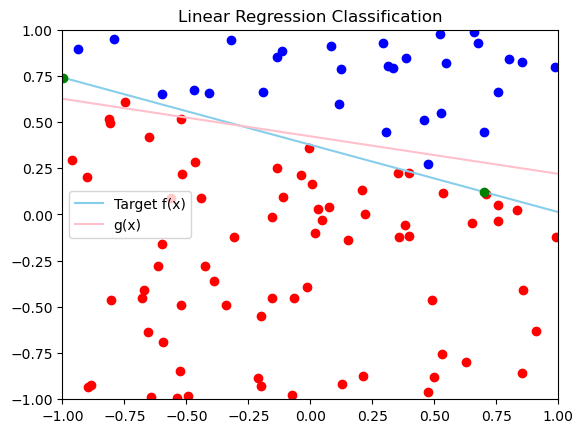

In [9]:
N = 100

# generate target function and data
w, A, B = generate_target_w()
X, y = generate_data_1(N, w)

# plot data points
plt.plot(X[:, 1][y.flatten() == 1], X[:, 2][y.flatten() == 1], 'ro')
plt.plot(X[:, 1][y.flatten() == -1], X[:, 2][y.flatten() == -1], 'bo')

# plot target function (f(x)) line
x_vals = np.array([-1, 1])
y_vals_target = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals_target, color = 'skyblue', label = 'Target f(x)')

# plot points A and B
plt.plot(A[0], A[1], 'go')
plt.plot(B[0], B[1], 'go')

# train linear regression and get hypothesis line
w_lr = train_lireg(X, y)
y_pred = compute_linreg_output(X, w_lr)

# plot hypothesis function (g(x)) line
y_vals_hypothesis = -(w_lr[0] + w_lr[1] * x_vals) / w_lr[2]
plt.plot(x_vals, y_vals_hypothesis, color = 'pink', label = 'g(x)')

# set plot limits and show legend
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.legend()
plt.title("Linear Regression Classification")
plt.show()

## 5 - 6.
This exercise is referenced from the source [2]. 

In [10]:
N_Q5 = 100
N_RUNS_Q5 = 1000
E_IN_TOTAL_Q5 = 0
E_OUT_TOTAL_Q5 = 0

for run in range(N_RUNS_Q5):
    # generate target function and training dataset
    w, A, B = generate_target_w()
    X_train, y_train = generate_data_1(N, w)

    # train linear regression and compute E_IN
    w_lr = train_lireg(X_train, y_train)
    y_pred_in = compute_linreg_output(X_train, w_lr)
    E_IN = np.mean(y_train != y_pred_in)
    
    # generate test dataset and compute E_OUT
    X_test, y_test = generate_data_1(N, w)
    y_pred_out = compute_linreg_output(X_test, w_lr)
    E_OUT = np.mean(y_test != y_pred_out)

    E_IN_TOTAL_Q5 += E_IN
    E_OUT_TOTAL_Q5 += E_OUT

print(f"Average E_IN: {E_IN_TOTAL_Q5 / N_RUNS_Q5}")
print(f"Average E_OUT: {E_OUT_TOTAL_Q5 / N_RUNS_Q5}")

Average E_IN: 0.038350000000000016
Average E_OUT: 0.04848000000000005


**Question 5**: the result closes to the answer: [c] 0.01

**Question 6**: the result closes to the answer: [c] 0.01

## 7.

In this question, after finding the weights using Linear Regression, we will run PLA until it converges to find a final vector of weights that completely separates all the in-sample points.

In [11]:
def run_PLA(X, y, w):
    """
    Runs PLA.
    
    Parameters
    ----------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    y : numpy array, shape (N, 1)
        The vector of outputs.
    w : numpy array, shape (3, 1)
        The vector of parameters of the initial model.
    
    Returns
    -------
    num_iterations : int
        The number of iterations PLA takes to converge.
    """
    iteration = 0       # number of iterations
    w_tmp = np.copy(w)    # copy of the initial model
    
    while True:
        misclassified = [] # List of misclassified points

        for i in range(X.shape[0]):
            # Check if the point is misclassified
            if np.sign(np.dot(X[i], w)) != y[i]:
                misclassified.append(i)
                w += y[i] * X[i].reshape(-1, 1) # Update w
                iteration += 1

        # If no point is misclassified, stop the loop
        if len(misclassified) == 0:
            break
    
    return iteration

In [12]:
N_Q7 = 10
N_RUNS_Q7 = 1000
N_ITERATIONS_TOTAL_Q7 = 0

for run in range(N_RUNS_Q7):
    # generate target function and data
    w, A, B = generate_target_w()
    X, y = generate_data_1(N_Q7, w)

    # train linear regression
    w_lr = train_lireg(X, y)

    # run PLA
    num_iterations = run_PLA(X, y, w_lr)
    
    N_ITERATIONS_TOTAL_Q7 += num_iterations

print(f"Average number of iterations: {N_ITERATIONS_TOTAL_Q7 / N_RUNS_Q7}")

Average number of iterations: 4.992


**Question 7**: the result closes to the answer: [a] 1

# Nonlinear Transformation

This part is referenced from the source [3].

In this part, we will use a different target function:
$$f(x_1, x_2) = \text{sign}({x_1}^2 + {x_2}^2 - 0.6)$$

Experiment:
- Generate a training set of N = 1,000 points on $X = [-1, 1] \times [-1, 1]$
- Generate simulated noise by flipping the sign of the ouput in a randomly selected 10% subset of the generated training set.

In [13]:
def generate_data_2(N):
    """
    Generates a data set by generating random inputs and then using new target function to generate the 
    corresponding outputs.
    
    Parameters
    ----------
    N : int
        The number of examples.
    
    Returns
    -------
    X : numpy array, shape (N, 3)
        The matrix of input vectors (each row corresponds to an input vector); the first column of 
        this matrix is all ones.
    y : numpy array, shape (N, 1)
        The vector of outputs.        
    """
    X = np.random.uniform(-1, 1, (N, 2))
    X = np.hstack((np.ones((N, 1)), X)) # Add 'ones' column
    y = np.sign(X[:,1] * X[:,1] + X[:,2] * X[:,2] - 0.6)
    
    return X, y

E_IN: 0.534


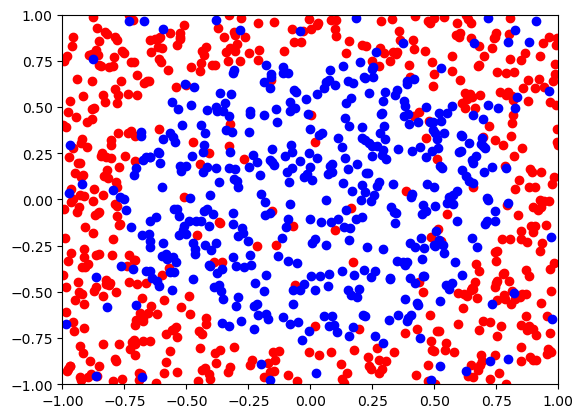

In [14]:
N = 1000

# generate training data
X, y = generate_data_2(N)

# flip 10% of the labels
indices = list(range(N))
np.random.shuffle(indices)
random_indices = indices[:(N // 10)] 
y[random_indices] *= -1

# train linear regression 
w_lr = train_lireg(X, y)
y_pred = compute_linreg_output(X, w_lr)
E_IN = np.mean(y != y_pred)
print(f"E_IN: {E_IN}")

# set limits for the plot and plot the data points
plt.plot(X[:,1][y.flatten() == 1], X[:,2][y.flatten() == 1], 'ro')
plt.plot(X[:,1][y.flatten() == -1], X[:,2][y.flatten() == -1], 'bo')
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.show()

## 8.

In [15]:
N_Q8 = 1000
N_RUNS_Q8 = 1000
E_IN_TOTAL_Q8 = 0

for run in range(N_RUNS_Q8):
    # generate training data
    X, y = generate_data_2(N_Q8)

    # flip 10% of the labels
    indices = list(range(N_Q8))
    np.random.shuffle(indices)
    random_indices = indices[:(N_Q8 // 10)] 
    y[random_indices] *= -1

    # train linear regression 
    w_lr = train_lireg(X, y)
    y_pred = compute_linreg_output(X, w_lr)
    E_IN = np.mean(y != y_pred)
    
    E_IN_TOTAL_Q8 += E_IN

print(f"Average E_IN: {E_IN_TOTAL_Q8 / N_RUNS_Q8}")

Average E_IN: 0.5069359999999997


**Question 8**: the result closes to the answer: [d] 0.5

## 9.

Transform N = 1,000 training data generated above into the nonlinear feature vector:
$$(1, \text{ } x_1,\text{ }  x_2, \text{ } x_1 x_2, \text{ } {x_1}^2, \text{ } {x_2}^2)$$

In [18]:
# new feature matrix
X_trans = np.transpose(np.array([np.ones(N), X[:,1], X[:,2], X[:,1] * X[:,2], X[:,1] * X[:,1], X[:,2] * X[:,2]]))

# linear regression on the new "feature matrix"
w_lr_trans = train_lireg(X_trans, y)

# the hypotheses that are given
w_a = np.array([-1, -0.05, 0.08, 0.13, 1.5, 1.5])
w_b = np.array([-1, -0.05, 0.08, 0.13, 1.5, 15])
w_c = np.array([-1, -0.05, 0.08, 0.13, 15, 1.5])
w_d = np.array([-1, -1.5, 0.08, 0.13, 0.05, 0.05])
w_e = np.array([-1, -0.05, 0.08, 1.5, 0.15, 0.15])

# compute classifications made by each hypothesis
y_lr_trans = compute_linreg_output(X_trans, w_lr_trans)
y_a = compute_linreg_output(X_trans, w_a)
y_b = compute_linreg_output(X_trans, w_b)
y_c = compute_linreg_output(X_trans, w_c)
y_d = compute_linreg_output(X_trans, w_d)
y_e = compute_linreg_output(X_trans, w_e)

difference_lr_a = sum(y_a != y_lr_trans) / N                                                                    
difference_lr_b = sum(y_b != y_lr_trans) / N
difference_lr_c = sum(y_c != y_lr_trans) / N
difference_lr_d = sum(y_d != y_lr_trans) / N
difference_lr_e = sum(y_e != y_lr_trans) / N

print("Difference between Linear Regression and a = ", difference_lr_a)
print("Difference between Linear Regression and b = ", difference_lr_b)
print("Difference between Linear Regression and c = ", difference_lr_c)
print("Difference between Linear Regression and d = ", difference_lr_d)
print("Difference between Linear Regression and e = ", difference_lr_e)
print("The weight vector of my hypothesis is: w_lr = ", w_lr_trans)

# compare predictions made by w_lr_trans with those made by targer function
print("Sanity check: E_in = ", sum(y != y_lr_trans) / N)

Difference between Linear Regression and a =  0.027
Difference between Linear Regression and b =  0.349
Difference between Linear Regression and c =  0.346
Difference between Linear Regression and d =  0.35
Difference between Linear Regression and e =  0.429
The weight vector of my hypothesis is: w_lr =  [-0.98919359  0.04227063  0.00627611  0.02099367  1.62408609  1.46084981]
Sanity check: E_in =  0.119


**Question 9**: the closest result to the answer: [a] $g(x_1, x_2) = \text{sign} (-1 - 0.05 x_1 + 0.08 x_2 + 0.13 x_1 x_2 + 1.5 {x_1}^2 + 1.5 {x_2}^2)$

# 10.

In [17]:
N_RUNS_Q10 = 1000
N_Q10 = 1000
E_OUT_TOTAL_Q10 = 0

for run in range(N_RUNS_Q10):
    # generate training data
    X, y = generate_data_2(N_Q10)

    # flip 10% of the labels
    indices = list(range(N_Q10))
    np.random.shuffle(indices)
    random_indices = indices[:(N_Q10 // 10)] 
    y[random_indices] *= -1

    # new feature matrix
    X_trans = np.transpose(np.array([np.ones(N_Q10), X[:,1], X[:,2], X[:,1] * X[:,2], X[:,1] * X[:,1], X[:,2] * X[:,2]]))

    # train linear regression
    y_pred = compute_linreg_output(X_trans, w_lr_trans)
    E_OUT = np.mean(y != y_pred)

    E_OUT_TOTAL_Q10 += E_OUT

print(f"Average E_OUT: {E_OUT_TOTAL_Q10 / N_RUNS_Q10}")

Average E_OUT: 0.12963900000000006


**Question 10**: the result closes to the answer: [b] 0.1

## References

[1]: "Hoeffding's Inequality". <i>notebook.community</i>, https://notebook.community/akhileshh/lfd-caltech/homework02. (Accessed date: 26/10/2024)

[2]: homefish. "edX Learning From Data 2017" <i>Github</i>, 2017, https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_2/homework_2_problem_5_6_linear_regression.ipynb. (Accessed date: 28/10/2024)

[3]: homefish. "edX Learning From Data 2017" <i>Github</i>, 2017, https://github.com/homefish/edX_Learning_From_Data_2017/blob/master/homework_2/homework_2_problem_8_9_10_Nonlinear_Transformation.ipynb. (Accessed date: 28/10/2024)